In [17]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('display.width', 200)

mpl.style.use('ggplot')

mpl.rc

datadir = '../data/linear/'

def read_df(path):
    df = None
    files = list()
    for f in os.listdir(path):
        if f.startswith('result'):
            path = os.path.join(datadir, f)
            if df is None:
                df = pd.read_csv(path)
            else:
                df = df.append(pd.read_csv(path), ignore_index=True)
    df.sort_values(['method', 'distribution_size', 'sample_size'], inplace=True)
    df.index = pd.MultiIndex.from_arrays([df.method, df.distribution_size, df.sample_size])
    df.drop(['method', 'distribution_size', 'sample_size'], axis=1, inplace=True)
    return df

dfs = dict()
dfs['random'] = read_df('../data/random')
dfs['linear'] = read_df('../data/linear')
dfs['quad'] = read_df('../data/quad')


         init_time         time  median_error   mean_error     std_error    min_error     max_error
count  2040.000000  2040.000000   2040.000000  2040.000000   2040.000000  2040.000000  2.040000e+03
mean      0.062989    15.592332     -0.587996     0.005220    170.320039    -0.944783  6.095644e+05
std       0.162859    95.801020      0.475620     0.211835    639.146751     0.199755  3.935276e+06
min       0.000000     0.000018     -1.000000    -0.499381      0.002034    -1.000000  1.238504e-02
25%       0.000021     0.000626     -1.000000    -0.009881      0.374738    -1.000000  2.841497e+01
50%       0.000465     0.026349     -1.000000    -0.000122      4.213828    -1.000000  8.590672e+02
75%       0.020263     1.221919     -0.008074     0.001062     47.574515    -1.000000  2.092693e+04
max       0.795017  2180.859942      0.002546     3.857210  11763.427350    -0.018688  9.636600e+07

         init_time         time  median_error   mean_error     std_error    min_error     max_error

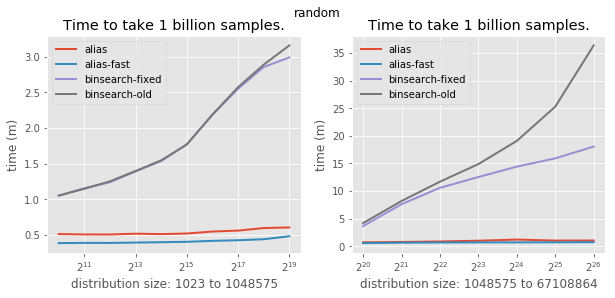

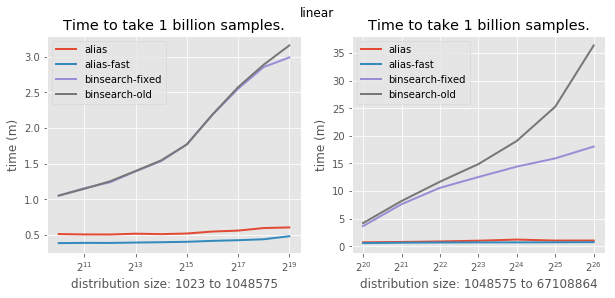

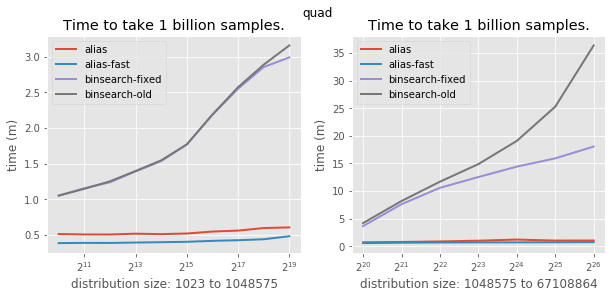

In [30]:

for dtype in ['random', 'linear', 'quad']:
    sample_size = (1 << 30) - 1
    f = plt.figure(figsize=(10, 4))
    f.suptitle(dtype)
    axes = list()
    axes.append(f.add_subplot(121))
    axes.append(f.add_subplot(122))

    ranges = [slice(1023, (1<<20) - 1), slice((1<<20)-1,(1<<26))]
    for i in range(2):
        ax = axes[i]
        time = df.time.loc[:,ranges[i],sample_size] / 60

        for method in time.index.levels[0]:
            time.loc[method].loc[:,sample_size].plot.line(ax=ax, label=method, lw=2)

        ax.set_xscale('log', basex=2)
        ax.legend()
        ax.set_title('Time to take 1 billion samples.')
        ax.set_xlabel('distribution size: {} to {}'.format(ranges[i].start, ranges[i].stop))
        ax.set_ylabel('time (m)')


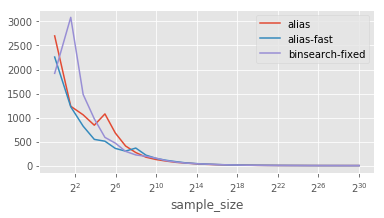

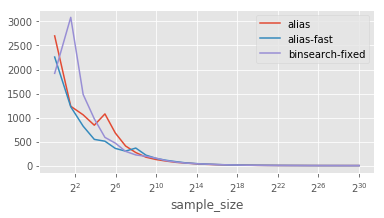

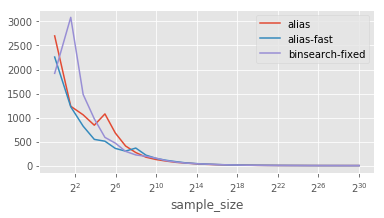

In [36]:
for dtype in ['random', 'linear', 'quad']:
    df = dfs[dtype]

    n = (1 << 10)
    plt.figure(figsize=(6, 3))
    for m in ['alias', 'alias-fast', 'binsearch-fixed']:
        (100 * df.loc[m,n].std_error).plot.line(label=m)

    plt.xscale('log', basex=2)
    plt.legend()
